# 311 Cases in San Francisco - Telling stories with data


## 1. Load and clean data

In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_theme()

In [3]:
# load data
client = Socrata("data.sfgov.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.sfgov.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vw6y-z8j6", limit=5000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.head()

,service_request_id,requested_datetime,updated_datetime,status_description,agency_responsible,service_name,service_subtype,service_details,address,street,...,:@computed_region_4isq_27mq,:@computed_region_pigm_ib2e,closed_date,:@computed_region_9jxd_iqea,:@computed_region_viu7_rrfi,:@computed_region_2dwj_jsy4,:@computed_region_n4xg_c4py,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_y6ts_4iup
0,15529180,2022-07-04T01:06:00.000,2022-07-04T01:09:54.000,Open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"699 HYDE ST, SAN FRANCISCO, CA, 94109",HYDE ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15529178,2022-07-04T00:58:00.000,2022-07-04T03:01:46.000,Open,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,Intersection of PRECITA AVE and HARRISON ST,PRECITA AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15529176,2022-07-04T00:56:00.000,2022-07-04T01:01:55.000,Open,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Tow,WHITE - FORD TRANSIT 250 - 61990X2,"470 3RD AVE, SAN FRANCISCO, CA, 94118",3RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15529168,2022-07-04T00:47:00.000,2022-07-04T04:01:25.000,Open,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Tow,DARK COLOR - HYUNDAI ELANTRA - 8XVU984,"210 PLYMOUTH AVE, SAN FRANCISCO, CA, 94112",PLYMOUTH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15529167,2022-07-04T00:46:02.000,2022-07-04T00:46:02.000,Open,Noise Report Queue,Noise Report,other_excessive_noise,Noise Report - other_excessive_noise,"2861 CALIFORNIA ST, SAN FRANCISCO, CA, 94115",CALIFORNIA ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   service_request_id               5000 non-null   object
 1   requested_datetime               5000 non-null   object
 2   updated_datetime                 5000 non-null   object
 3   status_description               5000 non-null   object
 4   agency_responsible               5000 non-null   object
 5   service_name                     5000 non-null   object
 6   service_subtype                  5000 non-null   object
 7   service_details                  5000 non-null   object
 8   address                          5000 non-null   object
 9   street                           4919 non-null   object
 10  supervisor_district              4919 non-null   object
 11  neighborhoods_sffind_boundaries  4919 non-null   object
 12  police_district                  4

In [5]:
df.columns

Index(['service_request_id', 'requested_datetime', 'updated_datetime',
       'status_description', 'agency_responsible', 'service_name',
       'service_subtype', 'service_details', 'address', 'street',
       'supervisor_district', 'neighborhoods_sffind_boundaries',
       'police_district', 'lat', 'long', 'point', 'source',
       ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv',
       ':@computed_region_26cr_cadq', ':@computed_region_ajp5_b2md',
       ':@computed_region_rxqg_mtj9', ':@computed_region_yftq_j783',
       ':@computed_region_jx4q_fizf', ':@computed_region_bh8s_q3mv',
       ':@computed_region_p5aj_wyqh', ':@computed_region_fyvs_ahh9',
       ':@computed_region_f58d_8dbm', ':@computed_region_vtsz_7cme',
       ':@computed_region_sruu_94in', ':@computed_region_6pnf_4xz7',
       ':@computed_region_jwn9_ihcz', 'status_notes', 'media_url',
       ':@computed_region_fcz8_est8', ':@computed_region_nqbw_i6c3',
       ':@computed_region_9dfj_4gjx', ':@computed_re

In [6]:
# keep the first 17 columns only
df = df[['service_request_id', 'requested_datetime', 'updated_datetime',
       'status_description', 'agency_responsible', 'service_name',
       'service_subtype', 'service_details', 'address', 'street',
       'supervisor_district', 'neighborhoods_sffind_boundaries',
       'police_district', 'lat', 'long', 'point', 'source']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   service_request_id               5000 non-null   object
 1   requested_datetime               5000 non-null   object
 2   updated_datetime                 5000 non-null   object
 3   status_description               5000 non-null   object
 4   agency_responsible               5000 non-null   object
 5   service_name                     5000 non-null   object
 6   service_subtype                  5000 non-null   object
 7   service_details                  5000 non-null   object
 8   address                          5000 non-null   object
 9   street                           4919 non-null   object
 10  supervisor_district              4919 non-null   object
 11  neighborhoods_sffind_boundaries  4919 non-null   object
 12  police_district                  4

In [7]:
# change column names to match with data set description
df.columns = ['case_id', 'open_time', 'update_time',
       'status', 'agency', 'category',
       'request_type', 'request_details', 'address', 'street',
       'supervisor_district', 'neighborhood',
       'police_district', 'lat', 'long', 'point', 'source']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   case_id              5000 non-null   object
 1   open_time            5000 non-null   object
 2   update_time          5000 non-null   object
 3   status               5000 non-null   object
 4   agency               5000 non-null   object
 5   category             5000 non-null   object
 6   request_type         5000 non-null   object
 7   request_details      5000 non-null   object
 8   address              5000 non-null   object
 9   street               4919 non-null   object
 10  supervisor_district  4919 non-null   object
 11  neighborhood         4919 non-null   object
 12  police_district      4918 non-null   object
 13  lat                  5000 non-null   object
 14  long                 5000 non-null   object
 15  point                5000 non-null   object
 16  source

In [8]:
# change data types
df['open_time'] = pd.to_datetime(df['open_time'])
df['update_time'] = pd.to_datetime(df['update_time'])
df.head()

,case_id,open_time,update_time,status,agency,category,request_type,request_details,address,street,supervisor_district,neighborhood,police_district,lat,long,point,source
0,15529180,2022-07-04 01:06:00,2022-07-04 01:09:54,Open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"699 HYDE ST, SAN FRANCISCO, CA, 94109",HYDE ST,3,Lower Nob Hill,CENTRAL,37.787090301514,-122.416763305664,"{'latitude': '37.7870903', 'longitude': '-122....",Phone
1,15529178,2022-07-04 00:58:00,2022-07-04 03:01:46,Open,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,Intersection of PRECITA AVE and HARRISON ST,PRECITA AVE,9,Bernal Heights,INGLESIDE,37.747299194336,-122.41138458252,"{'latitude': '37.74729919', 'longitude': '-122...",Twitter
2,15529176,2022-07-04 00:56:00,2022-07-04 01:01:55,Open,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Tow,WHITE - FORD TRANSIT 250 - 61990X2,"470 3RD AVE, SAN FRANCISCO, CA, 94118",3RD AVE,1,Inner Richmond,RICHMOND,37.77980933,-122.46081467,"{'latitude': '37.77980933', 'longitude': '-122...",Phone
3,15529168,2022-07-04 00:47:00,2022-07-04 04:01:25,Open,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Tow,DARK COLOR - HYUNDAI ELANTRA - 8XVU984,"210 PLYMOUTH AVE, SAN FRANCISCO, CA, 94112",PLYMOUTH AVE,11,Oceanview,TARAVAL,37.71269065,-122.45590688,"{'latitude': '37.71269065', 'longitude': '-122...",Phone
4,15529167,2022-07-04 00:46:02,2022-07-04 00:46:02,Open,Noise Report Queue,Noise Report,other_excessive_noise,Noise Report - other_excessive_noise,"2861 CALIFORNIA ST, SAN FRANCISCO, CA, 94115",CALIFORNIA ST,2,Lower Pacific Heights,RICHMOND,37.787799835205,-122.441352844238,"{'latitude': '37.78779984', 'longitude': '-122...",Web


## 2. Explore the variables

#### 2.1. Case statuses

About more than half of the cases are closed

Text(0.5, 1.0, 'Number of cases by status: more than half is closed')

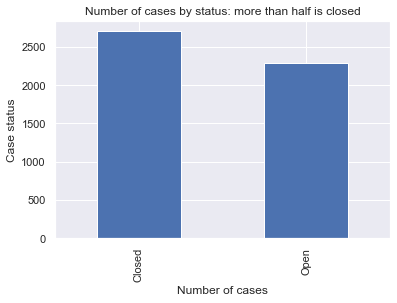

In [25]:
df["status"].value_counts().plot(kind="bar")
plt.xlabel("Number of cases")
plt.ylabel("Case status")
plt.title("Number of cases by status: more than half is closed")

#### 2.2. Case numbers by category

Street and sidewalk cleaning have the highest number of complains, followed by Parking enforcement (such as blocking driveway), graffiti and public works. Encampments is also in the top 5 most cases.

Text(0.5, 1.0, 'No of case by category: Street cleaning, parking, graffiti, and encampments have the most no of cases')

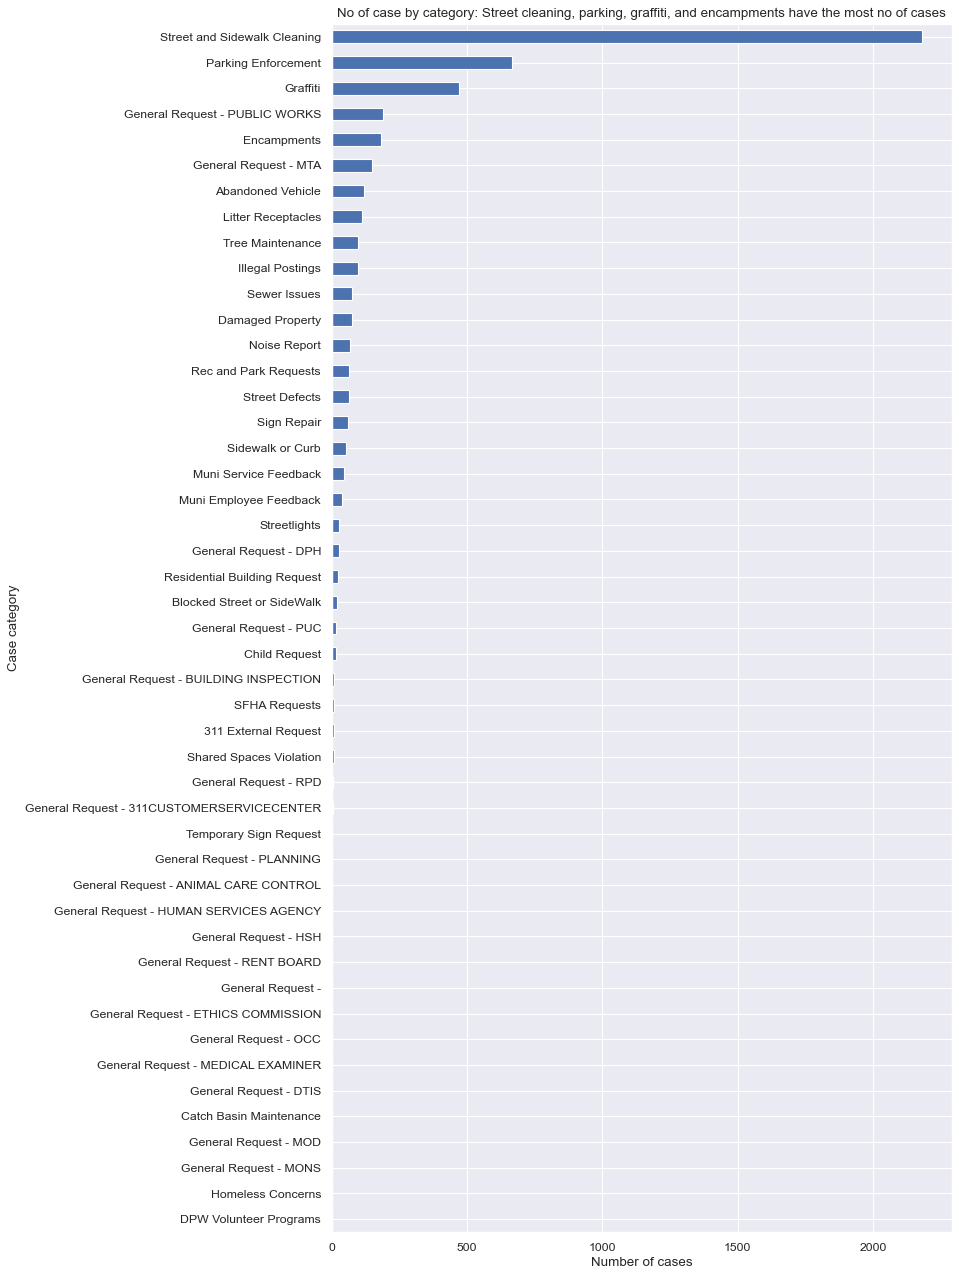

In [26]:
plt.figure(figsize=(10, 20), dpi=80)

df["category"].value_counts(ascending=True).plot(kind="barh")
plt.xlabel("Number of cases")
plt.ylabel("Case category")
plt.title("No of case by category: Street cleaning, parking, graffiti, and encampments have the most no of cases")


#### 2.3. Which neighborhoods have the most cases?

Text(0.5, 1.0, 'No of case by neighborhood: Mission, SoMa, Lower Nob Hill+Tenderloin, and Outer Sunset has highest number of cases')

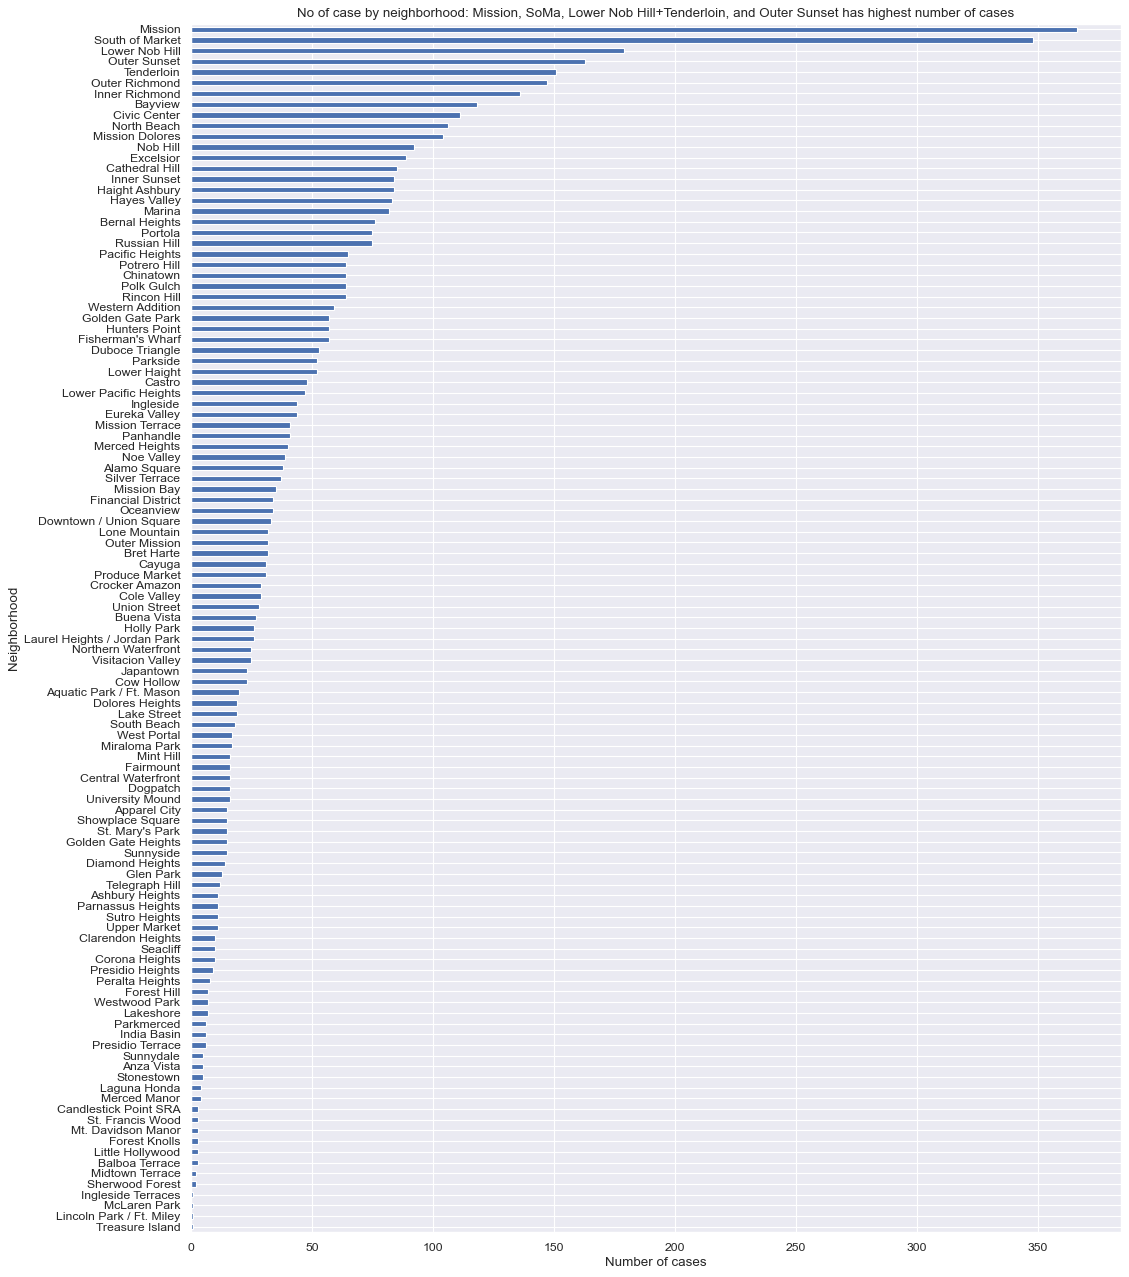

In [29]:
plt.figure(figsize=(15, 20), dpi=80)

df["neighborhood"].value_counts(ascending=True).plot(kind="barh")
plt.xlabel("Number of cases")
plt.ylabel("Neighborhood")
plt.title("No of case by neighborhood: Mission, SoMa, Lower Nob Hill+Tenderloin, and Outer Sunset has highest number of cases")

#### 2.4. Day and Time of cases being reported

Let's create columns for time of day and day of week to explore

In [32]:
# create columns
df["hour_of_day"] = df["open_time"].dt.hour
df["day_of_week"] = df["open_time"].dt.day_name


Text(0.5, 1.0, 'No of case by hour of day: Afternoon-evening hours have the highest number of cases')

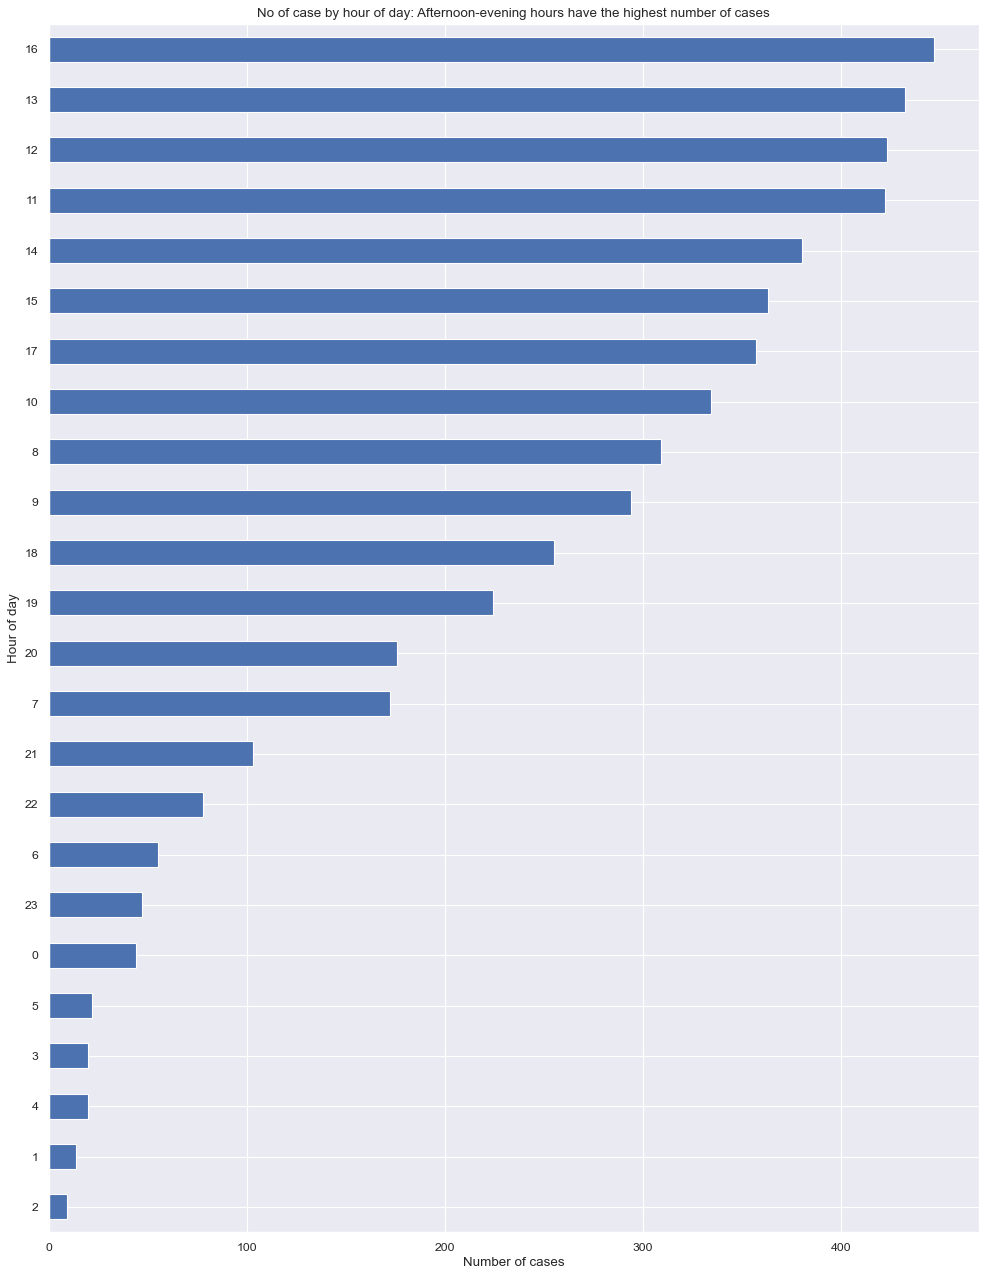

In [39]:
plt.figure(figsize=(15, 20), dpi=80)

df["hour_of_day"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Number of cases")
plt.ylabel("Hour of day")
plt.title("No of case by hour of day: Afternoon-evening hours have the highest number of cases")